<a href="https://colab.research.google.com/github/Jitendra-HUB/30-Days-30-ML-project-challenge-/blob/main/House%20price%20prediction-day1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [174]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [175]:
df=pd.read_csv("/content/1553768847-housing.csv")

In [176]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [177]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [178]:
df.shape

(20640, 10)

In [179]:
df.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,207
population,0
households,0
median_income,0
ocean_proximity,0
median_house_value,0


In [180]:
df['total_bedrooms'] = df['total_bedrooms'].fillna(0)
df['total_bedrooms'].isnull().sum()

0

In [181]:
df.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,0
population,0
households,0
median_income,0
ocean_proximity,0
median_house_value,0


In [182]:
df.value_counts("ocean_proximity")

,count
ocean_proximity,
<1H OCEAN,9136
INLAND,6551
NEAR OCEAN,2658
NEAR BAY,2290
ISLAND,5


In [183]:
dummies=df["ocean_proximity"].replace(['<1H OCEAN','INLAND','NEAR OCEAN','NEAR BAY','ISLAND'],[0,1,2,3,4])

In [184]:
df.drop(["ocean_proximity"],axis=1,inplace=True)

In [185]:
housing=pd.concat([df,dummies],axis=1)

In [186]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,3
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,3
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,3
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,3
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,3
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,78100,1
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,77100,1
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,92300,1
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,84700,1


In [187]:
housing.shape


(20640, 10)

In [188]:
housing.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
longitude,1.000000,-0.924664,-0.108197,0.044568,0.068082,0.099773,0.055310,-0.015176,-0.045967,-0.439870
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.065318,-0.108785,-0.071035,-0.079809,-0.144160,0.390957
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.317063,-0.296244,-0.302916,-0.119034,0.105623,0.145163
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.920196,0.857126,0.918484,0.198050,0.134153,-0.016309
total_bedrooms,0.068082,-0.065318,-0.317063,0.920196,1.000000,0.866266,0.966507,-0.007295,0.049148,-0.020381
population,0.099773,-0.108785,-0.296244,0.857126,0.866266,1.000000,0.907222,0.004834,-0.024650,-0.083537
households,0.055310,-0.071035,-0.302916,0.918484,0.966507,0.907222,1.000000,0.013033,0.065843,-0.027144
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007295,0.004834,0.013033,1.000000,0.688075,-0.039673
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049148,-0.024650,0.065843,0.688075,1.000000,0.021732
ocean_proximity,-0.439870,0.390957,0.145163,-0.016309,-0.020381,-0.083537,-0.027144,-0.039673,0.021732,1.000000


<Axes: >

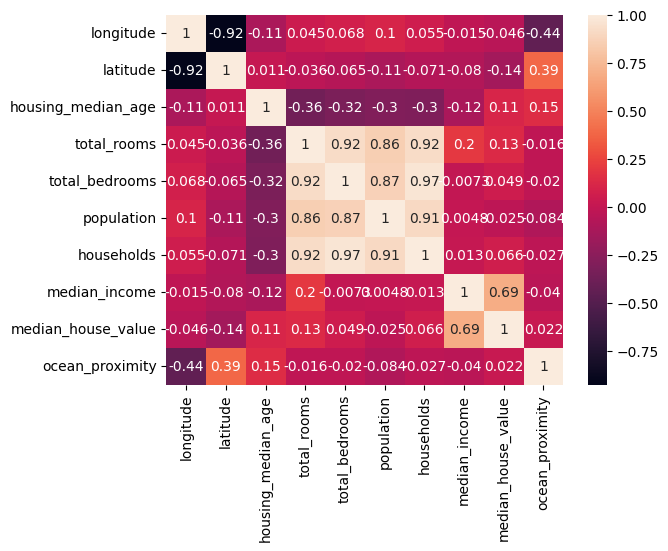

In [189]:
sns.heatmap(housing.corr(),annot=True)

In [190]:
housing.drop(["longitude","latitude","ocean_proximity","median_income","households"],axis=1,inplace=True)

In [191]:
housing

,housing_median_age,total_rooms,total_bedrooms,population,median_house_value
0,41,880,129.0,322,452600
1,21,7099,1106.0,2401,358500
2,52,1467,190.0,496,352100
3,52,1274,235.0,558,341300
4,52,1627,280.0,565,342200
...,...,...,...,...,...
20635,25,1665,374.0,845,78100
20636,18,697,150.0,356,77100
20637,17,2254,485.0,1007,92300
20638,18,1860,409.0,741,84700


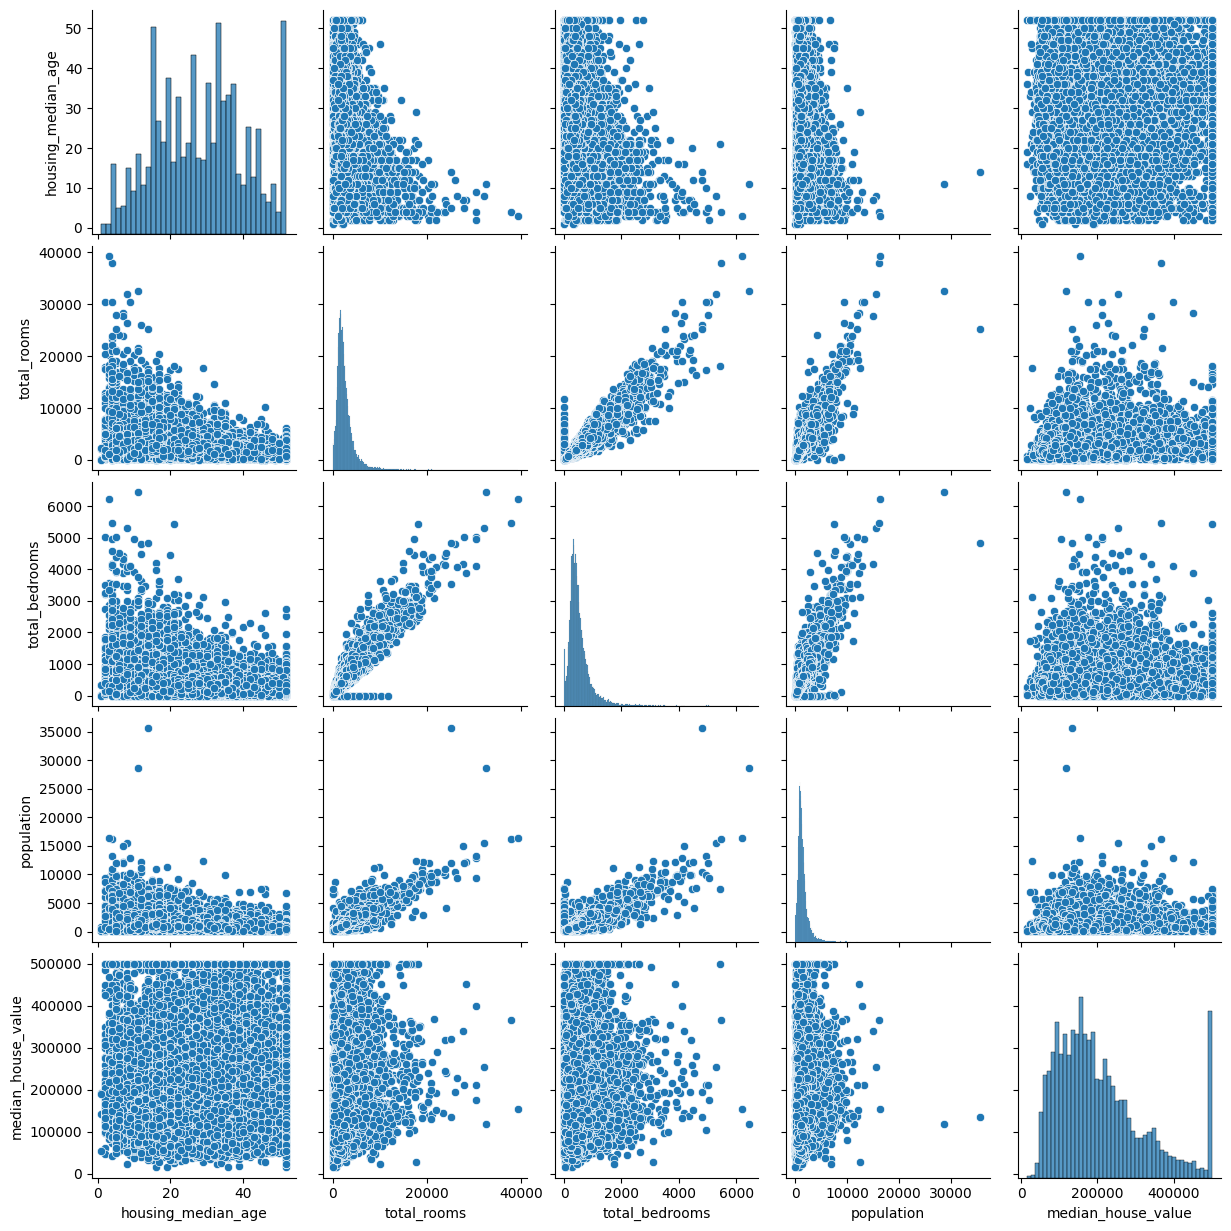

In [192]:
sns.pairplot(housing)

<BarContainer object of 20640 artists>

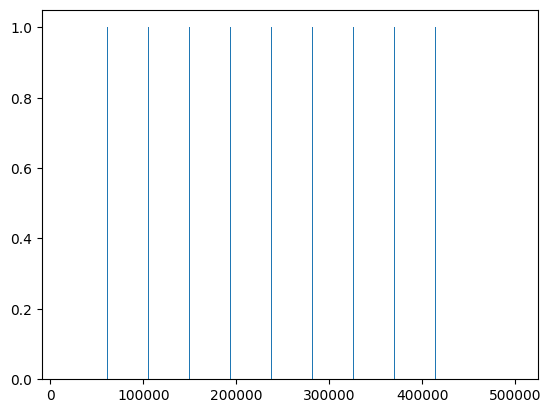

In [193]:
plt.bar(housing["median_house_value"],height=1)

In [194]:
x=housing.drop(["median_house_value"],axis=1)
y=housing["median_house_value"]

In [195]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,accuracy_score,classification_report,confusion_matrix
from sklearn.linear_model import LinearRegression

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [196]:
x.shape,y.shape,x_train.shape,x_test.shape,y_train.shape,y_test.shape

((20640, 4), (20640,), (15480, 4), (5160, 4), (15480,), (5160,))

In [197]:
model=LinearRegression()

In [198]:
model.fit(x_train,y_train)

LinearRegression()

In [209]:
pred=model.predict(x_test)
print(mean_squared_error(y_test,pred)*100)
print(r2_score(y_test,pred)*100)

1160646347877.0164
12.286089226898456


In [225]:
train_data = x_train.join(y_train)
train_data

,housing_median_age,total_rooms,total_bedrooms,population,median_house_value
8158,37,1798,331.0,860,228500
18368,42,2533,433.0,957,279900
19197,36,1943,337.0,711,183000
3746,32,3060,505.0,1159,465800
13073,17,1621,350.0,706,150000
...,...,...,...,...,...
11284,35,1330,201.0,658,229200
11964,33,3084,570.0,1753,97800
5390,36,2101,569.0,1756,222100
860,15,3575,597.0,1777,283500


In [224]:
model.predict([[41,880,129.0,322]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([231980.0716671])